In [6]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
%matplotlib inline
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Infosys 722').getOrCreate()
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

In [7]:
pra = pd.read_csv('Datasets/March-2018-quarter-trade 8.csv')

In [8]:
pra . shape

(24582, 8)

In [4]:
pra.head()

,Year,Quarter,Country,NZPort,Producttype,UnitOfMeasure,ExportQuantity,Revenue
0,2003,Mar,United Arab Emirates,Napier,Softwood Logs,Cubic Metre,5931.0,463311
1,2003,Mar,United Arab Emirates,Napier,Softwood Sawn Timber,Cubic Metre,1142.0,238526
2,2003,Mar,United Arab Emirates,Whangarei,Softwood Logs,Cubic Metre,4193.0,296527
3,2003,Mar,American Samoa,Auckland,Fibreboard,Cubic Metre,69.0,32188
4,2003,Mar,American Samoa,Auckland,Plywood,Cubic Metre,32.0,26682


In [5]:
pra.columns

Index(['Year', 'Quarter', 'Country', 'NZPort', 'Producttype ', 'UnitOfMeasure',
       'ExportQuantity', 'Revenue'],
      dtype='object')

In [6]:
pra.describe()

,Year,ExportQuantity,Revenue
count,24582.000000,2.326200e+04,2.458200e+04
mean,2010.197299,9.907731e+03,2.036845e+06
std,4.377842,4.646295e+04,6.995025e+06
min,2003.000000,0.000000e+00,0.000000e+00
25%,2006.000000,7.700000e+01,3.367125e+04
50%,2010.000000,4.650000e+02,1.701125e+05
75%,2014.000000,3.333750e+03,1.055310e+06
max,2018.000000,1.194610e+06,2.059438e+08


In [7]:
pra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
Year              24582 non-null int64
Quarter           24582 non-null object
Country           24582 non-null object
NZPort            24582 non-null object
Producttype       24582 non-null object
UnitOfMeasure     24582 non-null object
ExportQuantity    23262 non-null float64
Revenue           24582 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


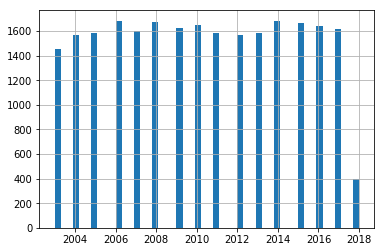

In [8]:
pra['Year'] . hist(bins=50)

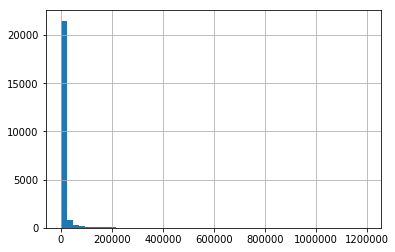

In [9]:
pra['ExportQuantity'] . hist(bins=50)

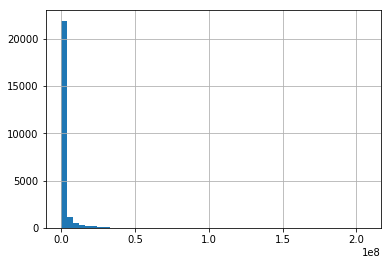

In [11]:
pra['Revenue'] . hist(bins=50)

Text(0.5,1,'NZexport')

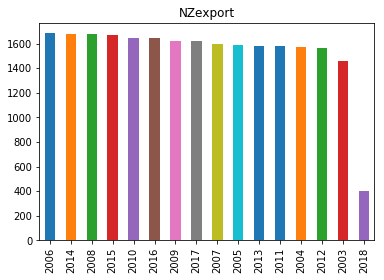

In [10]:
pra.Year.value_counts().plot(kind='bar', alpha=1)
mpl.title("NZexport")

Text(0.5,1,'NZexport')

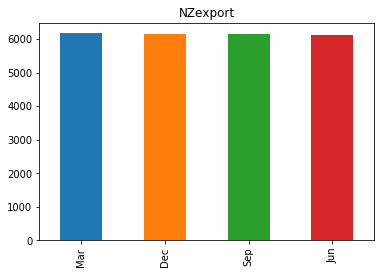

In [12]:
pra.Quarter.value_counts().plot(kind='bar', alpha=1)
mpl.title("NZexport")

Text(0.5,1,'NZexport')

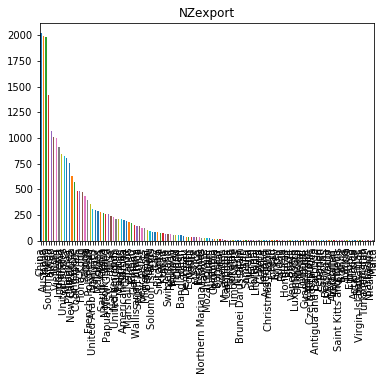

In [13]:
pra.Country.value_counts().plot(kind='bar', alpha=1)
mpl.title("NZexport")

Text(0.5,1,'NZexport')

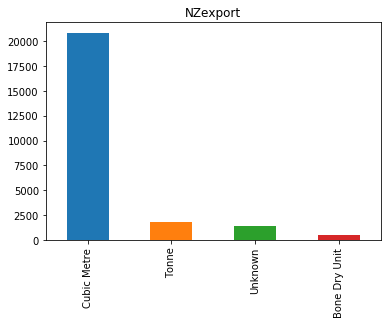

In [14]:
pra.UnitOfMeasure.value_counts().plot(kind='bar', alpha=1)
mpl.title("NZexport")

Text(0.5,1,'NZ export')

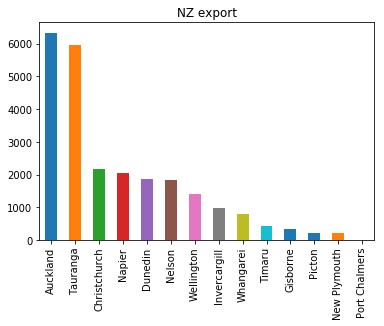

In [17]:
pra.NZPort.value_counts().plot(kind='bar', alpha=1)
mpl.title("NZ export")

Text(0.5,1,'Revenue')

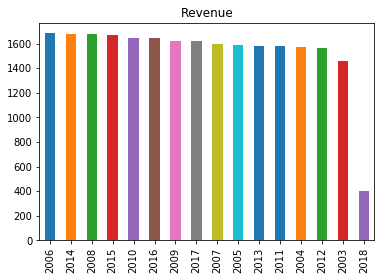

In [18]:
pra.Year.value_counts().plot(kind='bar', alpha=1)
mpl.title("Revenue")

Text(0.5,1,'Revenue')

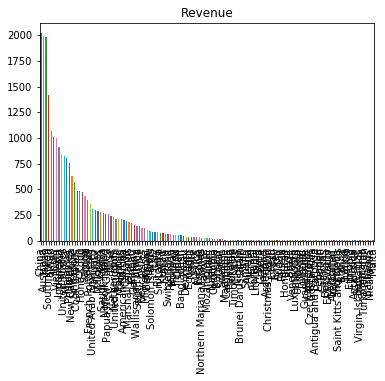

In [20]:
pra.Country.value_counts().plot(kind='bar', alpha=1)
mpl.title("Revenue")

Text(0,0.5,'Country')

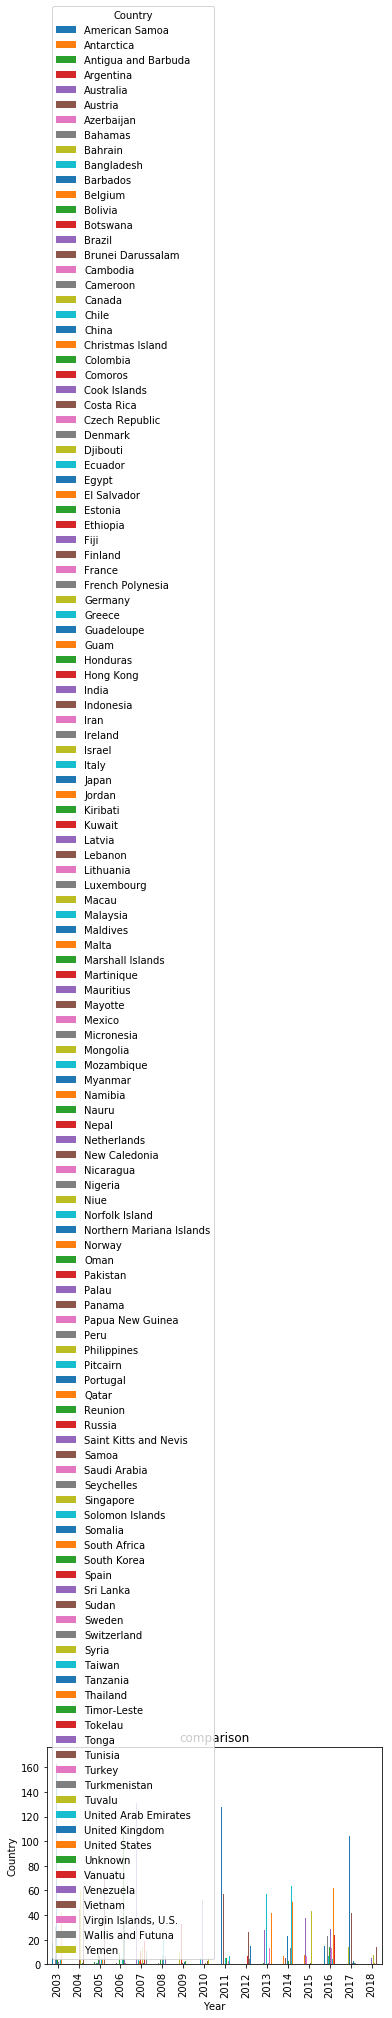

In [22]:
pd.crosstab(pra.Year,pra.Country).plot(kind='bar')
mpl.title('comparison')
mpl.xlabel('Year')
mpl.ylabel('Country')

Text(0,0.5,'Quarter')

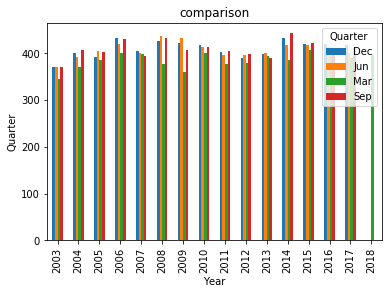

In [23]:
pd.crosstab(pra['Year'],pra['Quarter']).plot(kind='bar',stacked=False)
mpl.title('comparison')
mpl.xlabel('Year')
mpl.ylabel('Quarter')

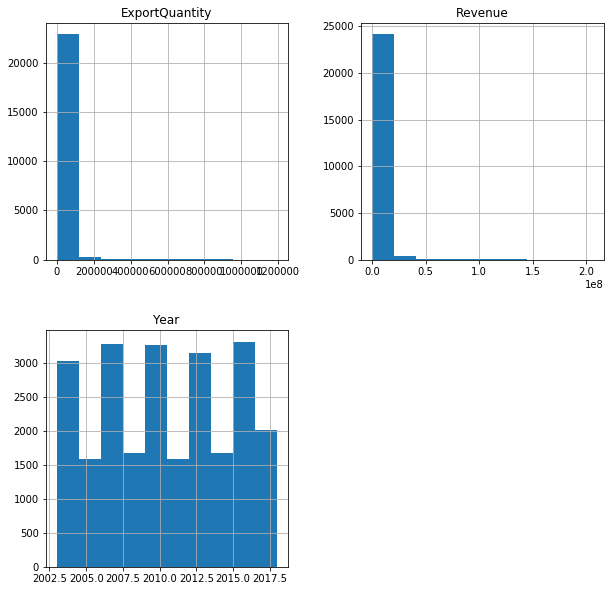

In [24]:
pra.select_dtypes(include=['int64']).columns
pra.hist(figsize=(10,10))
mpl.show()

In [25]:
pra.head()

,Year,Quarter,Country,NZPort,Producttype,UnitOfMeasure,ExportQuantity,Revenue
0,2003,Mar,United Arab Emirates,Napier,Softwood Logs,Cubic Metre,5931.0,463311
1,2003,Mar,United Arab Emirates,Napier,Softwood Sawn Timber,Cubic Metre,1142.0,238526
2,2003,Mar,United Arab Emirates,Whangarei,Softwood Logs,Cubic Metre,4193.0,296527
3,2003,Mar,American Samoa,Auckland,Fibreboard,Cubic Metre,69.0,32188
4,2003,Mar,American Samoa,Auckland,Plywood,Cubic Metre,32.0,26682


In [4]:
pra.isnull().sum()

Year                 0
Quarter              0
Country              0
NZPort               0
Producttype          0
UnitOfMeasure        0
ExportQuantity    1320
Revenue              0
dtype: int64

In [12]:
def convert_Quarter(Quarter):
    if Quarter == 'Mar':
        return '3'
    elif Quarter == 'Jun':
        return '4'
    elif Quarter == 'Sep':
        return '5'
    else:
        return '0'

In [13]:
pra.loc[:,'newQuarter'] = pra['Quarter'].apply(convert_Quarter)
pra['newQuarter']=pra['newQuarter'].astype(np.int64)

In [14]:
pra.head(500)

,Year,Quarter,Country,NZPort,Producttype,UnitOfMeasure,ExportQuantity,Revenue,newQuarter
0,2003,Mar,United Arab Emirates,Napier,Softwood Logs,Cubic Metre,5931.0,463311,3
1,2003,Mar,United Arab Emirates,Napier,Softwood Sawn Timber,Cubic Metre,1142.0,238526,3
2,2003,Mar,United Arab Emirates,Whangarei,Softwood Logs,Cubic Metre,4193.0,296527,3
3,2003,Mar,American Samoa,Auckland,Fibreboard,Cubic Metre,69.0,32188,3
4,2003,Mar,American Samoa,Auckland,Plywood,Cubic Metre,32.0,26682,3
5,2003,Mar,American Samoa,Auckland,Softwood Sawn Timber,Cubic Metre,185.0,112537,3
6,2003,Mar,Austria,Auckland,Softwood Sawn Timber,Cubic Metre,3.0,9374,3
7,2003,Mar,Australia,Auckland,Hardwood Sawn Timber,Cubic Metre,15.0,32631,3
8,2003,Mar,Australia,Auckland,MDF,Cubic Metre,779.0,436320,3
9,2003,Mar,Australia,Auckland,Other Logs,Unknown,NaN,4500,3


In [9]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Infosys 722').getOrCreate()

In [10]:
pra = spark.read.csv('Datasets/March-2018-quarter-trade 8.csv',header=True,inferSchema=True)

In [14]:
pra.show()

+----+-------+--------------------+------------+--------------------+-------------+--------------+--------+
|Year|Quarter|             Country|      NZPort|        Producttype |UnitOfMeasure|ExportQuantity| Revenue|
+----+-------+--------------------+------------+--------------------+-------------+--------------+--------+
|2003|    Mar|United Arab Emirates|      Napier|       Softwood Logs|  Cubic Metre|        5931.0|  463311|
|2003|    Mar|United Arab Emirates|      Napier|Softwood Sawn Timber|  Cubic Metre|        1142.0|  238526|
|2003|    Mar|United Arab Emirates|   Whangarei|       Softwood Logs|  Cubic Metre|        4193.0|  296527|
|2003|    Mar|      American Samoa|    Auckland|          Fibreboard|  Cubic Metre|          69.0|   32188|
|2003|    Mar|      American Samoa|    Auckland|             Plywood|  Cubic Metre|          32.0|   26682|
|2003|    Mar|      American Samoa|    Auckland|Softwood Sawn Timber|  Cubic Metre|         185.0|  112537|
|2003|    Mar|             A

In [15]:
pra.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Quarter: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- NZPort: string (nullable = true)
 |-- Producttype : string (nullable = true)
 |-- UnitOfMeasure: string (nullable = true)
 |-- ExportQuantity: double (nullable = true)
 |-- Revenue: integer (nullable = true)



In [16]:
print(pra.head(1))

[Row(Year=2003, Quarter='Mar', Country='United Arab Emirates', NZPort='Napier', Producttype ='Softwood Logs', UnitOfMeasure='Cubic Metre', ExportQuantity=5931.0, Revenue=463311)]


In [11]:
from pyspark.sql.functions import isnull,isnan,when,count,col,pow

pra.select([count(when(isnan(c)| col(c).isNull(),c)).alias(c) for c in pra.columns]).show()

+----+-------+-------+------+------------+-------------+--------------+-------+
|Year|Quarter|Country|NZPort|Producttype |UnitOfMeasure|ExportQuantity|Revenue|
+----+-------+-------+------+------------+-------------+--------------+-------+
|   0|      0|      0|     0|           0|            0|          1320|      0|
+----+-------+-------+------+------------+-------------+--------------+-------+



In [12]:
pra = pra.na.drop()
pra.select([count(when(isnan(c)| col(c).isNull(),c)).alias(c) for c in pra.columns]).show()

+----+-------+-------+------+------------+-------------+--------------+-------+
|Year|Quarter|Country|NZPort|Producttype |UnitOfMeasure|ExportQuantity|Revenue|
+----+-------+-------+------+------------+-------------+--------------+-------+
|   0|      0|      0|     0|           0|            0|             0|      0|
+----+-------+-------+------+------------+-------------+--------------+-------+



In [13]:
pra.printSchema()
print(pra.columns)

root
 |-- Year: integer (nullable = true)
 |-- Quarter: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- NZPort: string (nullable = true)
 |-- Producttype : string (nullable = true)
 |-- UnitOfMeasure: string (nullable = true)
 |-- ExportQuantity: double (nullable = true)
 |-- Revenue: integer (nullable = true)

['Year', 'Quarter', 'Country', 'NZPort', 'Producttype ', 'UnitOfMeasure', 'ExportQuantity', 'Revenue']


In [14]:
from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(inputCols = ['Year', 'ExportQuantity'], outputCol = 'features')
vector_output = vector_assembler.transform(pra)
vector_output.printSchema()
vector_output.head(1)

root
 |-- Year: integer (nullable = true)
 |-- Quarter: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- NZPort: string (nullable = true)
 |-- Producttype : string (nullable = true)
 |-- UnitOfMeasure: string (nullable = true)
 |-- ExportQuantity: double (nullable = true)
 |-- Revenue: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Year=2003, Quarter='Mar', Country='United Arab Emirates', NZPort='Napier', Producttype ='Softwood Logs', UnitOfMeasure='Cubic Metre', ExportQuantity=5931.0, Revenue=463311, features=DenseVector([2003.0, 5931.0]))]

In [15]:
vector_output = vector_output.select(['features', 'Revenue'])
print(vector_output.head(1))
vector_output.show(3)

[Row(features=DenseVector([2003.0, 5931.0]), Revenue=463311)]
+---------------+-------+
|       features|Revenue|
+---------------+-------+
|[2003.0,5931.0]| 463311|
|[2003.0,1142.0]| 238526|
|[2003.0,4193.0]| 296527|
+---------------+-------+
only showing top 3 rows



In [16]:
train_data,test_data = vector_output.randomSplit([0.7,0.3])
train_data.describe().show()
test_data.describe().show()

+-------+------------------+
|summary|           Revenue|
+-------+------------------+
|  count|             16382|
|   mean|2145506.2473446466|
| stddev|7337211.4477780145|
|    min|                 0|
|    max|         205943843|
+-------+------------------+

+-------+------------------+
|summary|           Revenue|
+-------+------------------+
|  count|              6880|
|   mean|2028951.5722383722|
| stddev| 6741397.142688702|
|    min|                 0|
|    max|         129825968|
+-------+------------------+



In [17]:
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 16382
Test Dataset Count: 6880


In [24]:
train_data.show()

+------------+-------+
|    features|Revenue|
+------------+-------+
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|      0|
|[2003.0,0.0]|     10|
|[2003.0,0.0]|    510|
|[2003.0,0.0]|   1807|
|[2003.0,0.0]|   3400|
|[2003.0,1.0]|    695|
|[2003.0,1.0]|   1339|
|[2003.0,1.0]|   1340|
|[2003.0,1.0]|   1683|
|[2003.0,1.0]|   2184|
+------------+-------+
only showing top 20 rows



In [18]:
from pyspark.ml.regression import LinearRegression

In [19]:
print(pra.head()) 
pra.printSchema()

Row(Year=2003, Quarter='Mar', Country='United Arab Emirates', NZPort='Napier', Producttype ='Softwood Logs', UnitOfMeasure='Cubic Metre', ExportQuantity=5931.0, Revenue=463311)
root
 |-- Year: integer (nullable = true)
 |-- Quarter: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- NZPort: string (nullable = true)
 |-- Producttype : string (nullable = true)
 |-- UnitOfMeasure: string (nullable = true)
 |-- ExportQuantity: double (nullable = true)
 |-- Revenue: integer (nullable = true)



In [20]:
lr = LinearRegression(featuresCol='features', labelCol='Revenue')

In [21]:
lr_model = lr.fit(train_data)

In [22]:
lr_model.coefficients

DenseVector([34416.4278, 142.6241])

In [23]:
# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

Coefficients: [34416.42784115345,142.6241326695357]
Intercept: -68479639.20122989

RMSE: 2972483.0156226098
R2: 0.8358642420904803


In [24]:
train_data.describe().show()

+-------+------------------+
|summary|           Revenue|
+-------+------------------+
|  count|             16382|
|   mean|2145506.2473446466|
| stddev|7337211.4477780145|
|    min|                 0|
|    max|         205943843|
+-------+------------------+



In [32]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 3112755.7123856153
R2 on test data: 0.8515681351784589


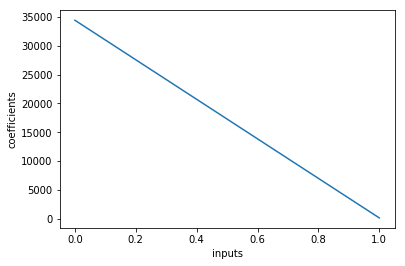

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(lr_model.coefficients)
plt.xlabel('inputs')
plt.ylabel('coefficients')
plt.show()

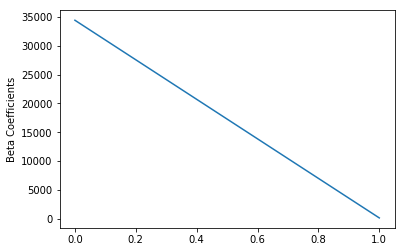

In [31]:
plt.plot(lr_model.coefficients)
plt.ylabel('Beta Coefficients')
plt.show()

In [33]:
train_data.describe().show()

+-------+------------------+
|summary|           Revenue|
+-------+------------------+
|  count|             16382|
|   mean|2145506.2473446466|
| stddev|7337211.4477780145|
|    min|                 0|
|    max|         205943843|
+-------+------------------+



In [33]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","Revenue","features").show(50)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Revenue",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-------+-------------+
|        prediction|Revenue|     features|
+------------------+-------+-------------+
|494835.71445034444|      0| [2003.0,0.0]|
|494835.71445034444|      0| [2003.0,0.0]|
|494835.71445034444|      0| [2003.0,0.0]|
|494835.71445034444|      0| [2003.0,0.0]|
|494835.71445034444|    100| [2003.0,0.0]|
|494835.71445034444|   1400| [2003.0,0.0]|
|494835.71445034444|   1564| [2003.0,0.0]|
|494835.71445034444| 133661| [2003.0,0.0]|
| 494974.3766730428|    303| [2003.0,1.0]|
| 494974.3766730428|    911| [2003.0,1.0]|
| 494974.3766730428|   1400| [2003.0,1.0]|
| 494974.3766730428|   1682| [2003.0,1.0]|
| 494974.3766730428|   1993| [2003.0,1.0]|
| 494974.3766730428|   2459| [2003.0,1.0]|
| 494974.3766730428|   4494| [2003.0,1.0]|
| 495113.0388957262|   1796| [2003.0,2.0]|
| 495113.0388957262|   2574| [2003.0,2.0]|
|495251.70111842453|   1200| [2003.0,3.0]|
|495251.70111842453|   1483| [2003.0,3.0]|
|495251.70111842453|   2566| [2003.0,3.0]|
|495251.701

In [34]:
predictions = lr_model.transform(test_data)
predictions.select("prediction","Revenue","features").show()

+------------------+-------+------------+
|        prediction|Revenue|    features|
+------------------+-------+------------+
|494835.71445034444|      0|[2003.0,0.0]|
|494835.71445034444|      0|[2003.0,0.0]|
|494835.71445034444|      0|[2003.0,0.0]|
|494835.71445034444|      0|[2003.0,0.0]|
|494835.71445034444|    100|[2003.0,0.0]|
|494835.71445034444|   1400|[2003.0,0.0]|
|494835.71445034444|   1564|[2003.0,0.0]|
|494835.71445034444| 133661|[2003.0,0.0]|
| 494974.3766730428|    303|[2003.0,1.0]|
| 494974.3766730428|    911|[2003.0,1.0]|
| 494974.3766730428|   1400|[2003.0,1.0]|
| 494974.3766730428|   1682|[2003.0,1.0]|
| 494974.3766730428|   1993|[2003.0,1.0]|
| 494974.3766730428|   2459|[2003.0,1.0]|
| 494974.3766730428|   4494|[2003.0,1.0]|
| 495113.0388957262|   1796|[2003.0,2.0]|
| 495113.0388957262|   2574|[2003.0,2.0]|
|495251.70111842453|   1200|[2003.0,3.0]|
|495251.70111842453|   1483|[2003.0,3.0]|
|495251.70111842453|   2566|[2003.0,3.0]|
+------------------+-------+------

# Decision Tree

In [35]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [36]:
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Revenue')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(labelCol="Revenue", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 5.72117e+06


In [37]:
dt_model.featureImportances

SparseVector(2, {0: 0.079, 1: 0.921})

In [38]:
train_data.take(20)

[Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=0),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=10),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=510),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=1807),
 Row(features=DenseVector([2003.0, 0.0]), Revenue=3400),
 Row(features=DenseVector([2003.0, 1.0]), Revenue=695),
 Row(features=DenseVector([2003.0, 1.0]), Revenue=1339),
 Row(features=DenseVector([2003.0, 1.0]), Revenue=1340),
 Row(featur

# Gradient boosted tree regression# 

In [39]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Revenue', maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'Revenue', 'features').show(20)


+------------------+-------+------------+
|        prediction|Revenue|    features|
+------------------+-------+------------+
| 66585.27674216221|      0|[2003.0,0.0]|
| 66585.27674216221|      0|[2003.0,0.0]|
| 66585.27674216221|      0|[2003.0,0.0]|
| 66585.27674216221|      0|[2003.0,0.0]|
| 66585.27674216221|    100|[2003.0,0.0]|
| 66585.27674216221|   1400|[2003.0,0.0]|
| 66585.27674216221|   1564|[2003.0,0.0]|
| 66585.27674216221| 133661|[2003.0,0.0]|
| 66585.27674216221|    303|[2003.0,1.0]|
| 66585.27674216221|    911|[2003.0,1.0]|
| 66585.27674216221|   1400|[2003.0,1.0]|
| 66585.27674216221|   1682|[2003.0,1.0]|
| 66585.27674216221|   1993|[2003.0,1.0]|
| 66585.27674216221|   2459|[2003.0,1.0]|
| 66585.27674216221|   4494|[2003.0,1.0]|
|19732.163934790384|   1796|[2003.0,2.0]|
|19732.163934790384|   2574|[2003.0,2.0]|
|19732.163934790384|   1200|[2003.0,3.0]|
|19732.163934790384|   1483|[2003.0,3.0]|
|19732.163934790384|   2566|[2003.0,3.0]|
+------------------+-------+------

In [40]:
from pyspark.ml.evaluation import RegressionEvaluator
gbt_evaluator = RegressionEvaluator(
    labelCol="Revenue", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 5.79973e+06
